In [166]:
# dev my own greedy algorithm

In [167]:
# use as training the function B1 from
# 1701.00550

In [168]:
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams.update({'font.size': 18})

In [169]:
import numpy as np

In [170]:
def Xfun(t, lam, B="B1"):
    if B == "B1":
        # eq B1
        return np.sin(lam*t) + 1e-5 * np.sin(10*lam*t) + 1e-10*np.random.rand(len(t))
    elif B == "B2":
        # eq B2
        return np.sin(lam*t) + 1e-1*np.random.rand(len(t))

In [171]:
times = np.linspace(0, 10, 1000)

In [172]:
Xfun(times, 1).shape

(1000,)

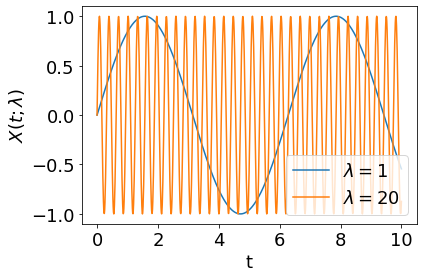

In [173]:
plt.figure()
plt.plot(times, Xfun(times, 1), label=r'$\lambda=1$')
plt.plot(times, Xfun(times, 20), label=r'$\lambda=20$')
plt.xlabel('t')
plt.ylabel(r'$X(t;\lambda)$')
plt.legend()

In [174]:
def make_training_set(t_params, lambda_params):
    times = np.linspace(*t_params)
    lambdas = np.linspace(*lambda_params)
    
    # make mem
    data = np.zeros((len(lambdas), len(times)))
    
    for i, l in enumerate(lambdas):
        data[i] = Xfun(times, l)
        
    return times, data

In [175]:
times, training_set = make_training_set([0, 10, 10000], [1, 20, 1000])

In [176]:
training_set.shape
# first index if for lambda
# second index if for the times

(1000, 10000)

In [177]:
times.shape

(10000,)

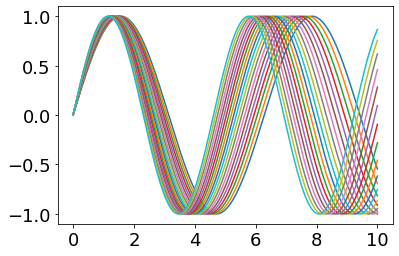

In [178]:
plt.figure()
for i in range(training_set.shape[0])[:20]:
    plt.plot(times, training_set[i])
plt.show()
plt.close()

In [179]:
def compute_svd(matrix):
    u, s, vh          = np.linalg.svd(matrix, full_matrices=False)
    return u,s,vh

In [180]:
u,s,vh = compute_svd(training_set)

In [181]:
print("u.shape = {0}".format(u.shape))
print("s.shape = {0}".format(s.shape))
print("vh.shape = {0}".format(vh.shape))

u.shape = (1000, 1000)
s.shape = (1000,)
vh.shape = (1000, 10000)


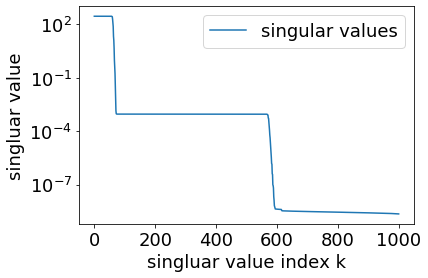

In [218]:
plt.plot(range(len(s)),s, label='singular values')
plt.ylabel('singluar value')
plt.xlabel('singluar value index k')
plt.legend(loc='best')
plt.yscale('log')

In [191]:
def compute_representation(training_set, vh):
    proj_coeffs = np.dot(vh, training_set)
    representation = np.dot(proj_coeffs, vh)
    return representation

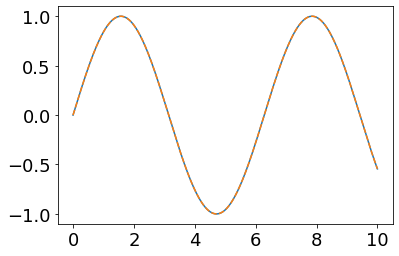

In [195]:
plt.figure()
plt.plot(times, training_set[0])
plt.plot(times, compute_representation(training_set[0], vh), ls='--')

In [226]:
def projection_error(training_set, vh):
    """
    also called greedy error?
    """
    representation = compute_representation(training_set, vh)
    return np.max(np.abs(training_set - representation))

In [227]:
# when compute
p_errors = np.zeros(training_set.shape[0])
for i in range(training_set.shape[0]):
    p_errors[i] = projection_error(training_set[i], vh[0:i,:])

Text(0, 0.5, 'Max projection error')

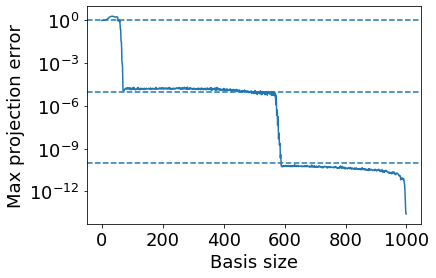

In [228]:
# this reproduces fig 24 of arxiv:1701.00550
plt.figure()
plt.plot(range(len(s)), p_errors)
plt.axhline(1e0, ls='--')
plt.axhline(1e-5, ls='--')
plt.axhline(1e-10, ls='--')
plt.yscale('log')
plt.xlabel('Basis size')
plt.ylabel('Max projection error')

# the above used a uniform spacing for lambda now lets use a greedy algorithm to pick lambdas

In [ ]:
# using 1308.3565

In [231]:
times = np.linspace(0, 10, 1000)

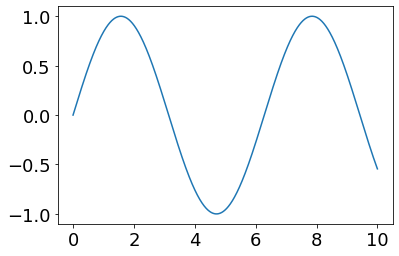

In [233]:
plt.figure()
plt.plot(times, seed)
plt.show()
plt.close()

In [ ]:
# instead could do svd at each step?

In [435]:
Lambda1 = 1
e1 = Xfun(times, Lambda1)

In [437]:
norm=np.trapz(times, e1 * e1)

In [ ]:
e1/norm

In [439]:
np.trapz(times, e1/norm * e1)

0.9999999999999991

In [447]:
def norm(t, a):
    return np.trapz(t, a*a)

In [448]:
def inner(t, a, b):
    return np.trapz(t, a.conj()*b)

In [474]:
def proj(t, a, b):
    norm_a = norm(t,a)
    return inner(t,a,b) * a / norm_a

In [503]:
def greedy(times, tol=1e-6):
    i=0
    sigma0=1
    sigmas=[sigma0]
    
    # seed
    Lambda1 = 1
    e1 = Xfun(times, Lambda1)
    
    Lambda2 = 2
    e2 = Xfun(times, Lambda2)
    
    RB = np.array([e1, e2])


    set1 = [1,2,3,4]
    set2 = [1,2,3,4]
    sets = [set1,set2]
    
    def proj_error_from_basis(times, basis, h):
        hnorm = norm(times, h)
        dim = basis.shape[0]
        ans = 0.
        for ii in range(dim):
            ans += np.abs(proj(times, basis[ii], h))**2
        return hnorm**2 - ans
    
    for k in range(2):
#     while sigma0 >= tol:
#         i+=1
        # compute representation error for current set
        cset = sets[k]
        # true values
        truex = [Xfun(times, c) for c in cset]

        errors = []
        for c in range(len(cset)):
            errors.append(np.max(proj_error_from_basis(times, RB, truex[c])))

        errors = np.array(errors)
        print(errors)
        max_err_idx = np.argmax(errors)
        print(max_err_idx)
        max_err = np.max(errors)
        print(max_err)
        
#         for c in cset:
#             np.max(np.abs(truex[c] - proj(times, RB[0], truex[c])))


#         ret = [np.max(np.abs(truex[c] - proj(times, RB[0], truex[c]))) for c in range(len(cset))]
#         print(ret)

In [504]:
greedy(times)

[ 3.28380629 11.74883964 22.43793016  0.23982994]
2
22.437930161777835
[ 3.28380629 11.74883964 22.43793016  0.23982994]
2
22.43793015741532


In [464]:
ls=[1,4,5]
xs = np.array([Xfun(times,l) for l in ls])
pc, RB, Pxs, P1, P2, P3 = greedy(ls, xs, times)

TypeError: greedy() takes from 1 to 2 positional arguments but 3 were given

In [433]:
x1=xs[0]/np.trapz(times, xs[0]*xs[0])

In [434]:
np.trapz(times, x1*x1)

-0.5518375321879461

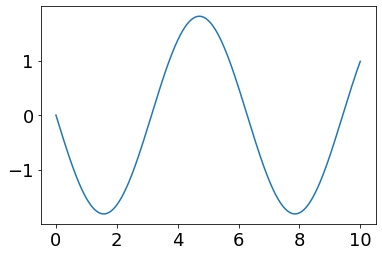

In [421]:
plt.plot(times, np.trapz(times, xs[0]*xs[0]) * xs[0])

In [442]:
np.max(np.abs(xs[0] - P1))

9.585410243317938e-11

In [443]:
np.max(np.abs(xs[1] - P2))

3.015089544240538

In [414]:
np.trapz(times, xs[0]*xs[0])

-1.812127558694971

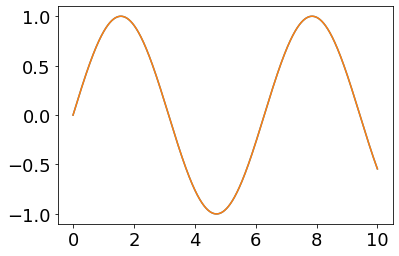

In [444]:
plt.plot(times, xs[0])
plt.plot(times, P1)

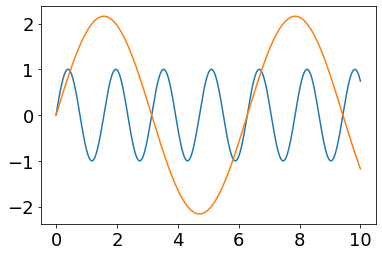

In [445]:
plt.plot(times, xs[1])
plt.plot(times, P2)

In [320]:
pc = np.dot(xs[0], xs[0])
print(pc)

476.84803940598573


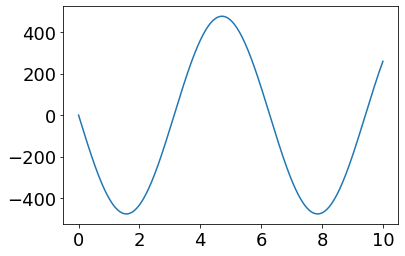

In [346]:
plt.plot(times, xs[0] - np.dot(pc, xs[0]))

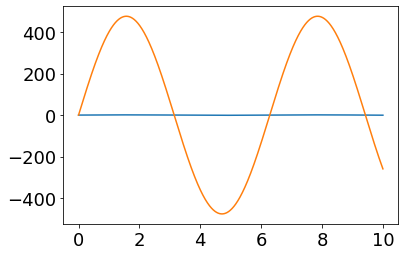

In [343]:
plt.plot(times, xs[0])
plt.plot(times, np.dot(pc, xs[0]))

In [298]:
pc

array([476.84803941, -14.03165773,  11.91150203])

In [299]:
RB.shape

(1000,)

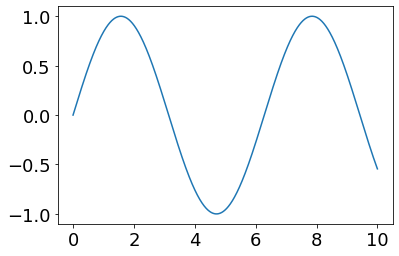

In [300]:
plt.figure()
plt.plot(times, RB)

In [301]:
Pxs.shape

(3, 1000)

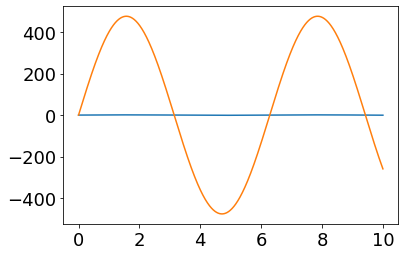

In [302]:
plt.figure()
plt.plot(times, xs[0])
plt.plot(times, Pxs[0])